<a href="https://colab.research.google.com/github/bcamposbernardes-maker/Codigos-trabalhos-facu-/blob/main/Cepprova.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import pandas as pd

df = pd.read_csv('BrunaCampos_CEP_Prova1.csv', sep=None, engine='python')
print("Colunas encontradas:")
print(df.columns.tolist())
print("\nPrimeiras linhas:")
print(df.head())


Colunas encontradas:
['Amostra', 'Medida_1', 'Medida_2', 'Medida_3', 'Medida_4', 'Medida_5']

Primeiras linhas:
   Amostra                Medida_1                Medida_2  \
0        1   1.688.769.166.519.890   3.842.931.469.320.270   
1        2   1.947.631.785.549.900  36.402.481.547.869.600   
2        3  19.771.761.162.288.400   1.182.039.904.620.370   
3        4  17.657.005.675.143.800  15.669.298.250.945.000   
4        5   4.546.620.326.750.600  19.240.909.327.608.800   

                 Medida_3                Medida_4                Medida_5  
0  17.298.233.135.322.100   4.970.736.917.579.200   2.918.345.013.773.020  
1  19.682.297.582.260.500   5.981.373.734.179.470   2.499.394.266.162.410  
2   5.311.932.414.177.550   2.990.150.686.304.790  27.461.092.564.866.700  
3  18.180.651.016.726.000   6.138.760.993.010.100   5.386.317.099.580.710  
4  16.371.169.462.304.500  34.941.369.638.893.400  15.141.758.834.856.000  


In [16]:
df = pd.read_csv('BrunaCampos_CEP_Prova1.csv', sep=';', engine='python')
print(df.columns)


Index(['Amostra', 'Medida_1', 'Medida_2', 'Medida_3', 'Medida_4', 'Medida_5'], dtype='object')


‚úÖ Dados carregados com sucesso!
Dimens√µes: (25, 6)
   Amostra           Medida_1           Medida_2           Medida_3  \
0        1   1688769166519890   3842931469320270  17298233135322100   
1        2   1947631785549900  36402481547869600  19682297582260500   
2        3  19771761162288400   1182039904620370   5311932414177550   
3        4  17657005675143800  15669298250945000  18180651016726000   
4        5   4546620326750600  19240909327608800  16371169462304500   

            Medida_4           Medida_5  
0   4970736917579200   2918345013773020  
1   5981373734179470   2499394266162410  
2   2990150686304790  27461092564866700  
3   6138760993010100   5386317099580710  
4  34941369638893400  15141758834856000  

üìä Estat√≠sticas calculadas (primeiras 5 amostras):
   Amostra         Media          Amplitude
0        1  6.143803e+15  15609463968802210
1        2  1.330264e+16  34454849762319700
2        3  1.134340e+16  26279052660246330
3        4  1.260641e+16  1279433391

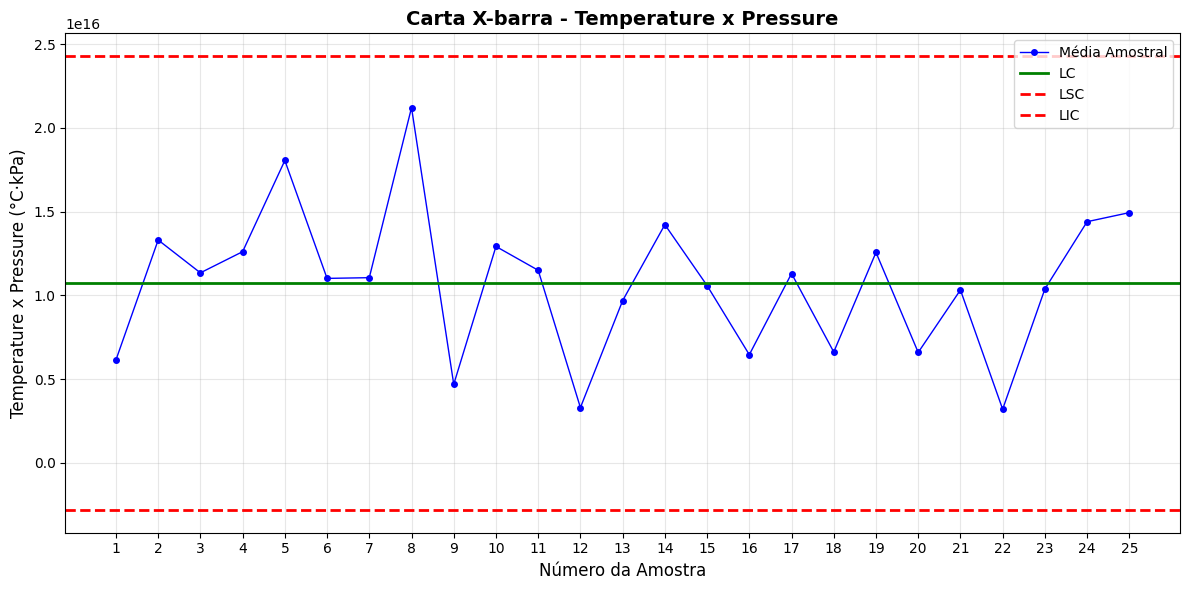

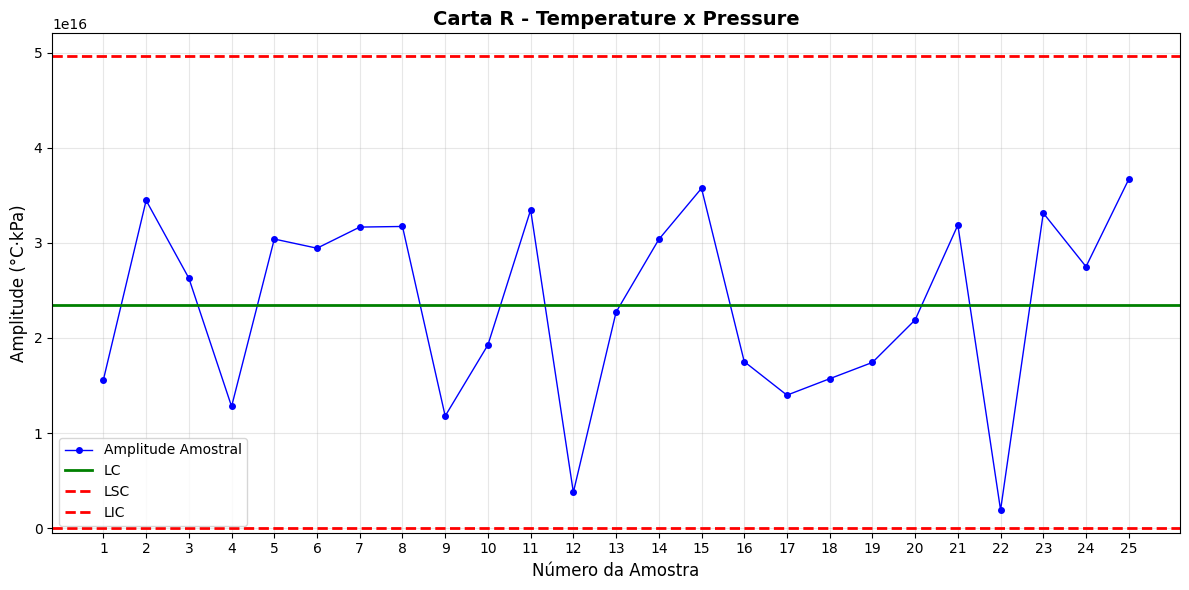


--- üîç PONTOS FORA DE CONTROLE ---
Nenhum ponto fora dos limites de controle (processo est√°vel).

--- üìò INTERPRETA√á√ÉO ---
‚úì O processo est√° sob controle estat√≠stico (sem causas especiais).

A√ß√µes recomendadas:
  ‚Ä¢ Investigar amostras fora de controle.
  ‚Ä¢ Verificar calibra√ß√£o e condi√ß√µes do equipamento.
  ‚Ä¢ Revisar par√¢metros operacionais e treinar operadores.

‚úÖ Arquivos gerados com sucesso:
  ‚Ä¢ Carta_Xbarra.png
  ‚Ä¢ Carta_R.png
  ‚Ä¢ BrunaCampos_CEP_Prova1_stats.csv

Resumo Estat√≠stico Final:
  ‚Ä¢ M√©dia Global: 10734944448705698.000000
  ‚Ä¢ Variabilidade M√©dia: 23479434664232080.000000
  ‚Ä¢ Sigma estimado: 10094339924433396.000000
  ‚Ä¢ Faixa de 6œÉ estimada: 60566039546600376.000000

--- INTERPRETA√á√ÉO E AN√ÅLISE DOS RESULTADOS ---
‚úì O processo est√° sob controle estat√≠stico. Nenhuma causa especial detectada.


In [17]:
# ================================================================
# CEP - PROVA 1 | Universidade de Bras√≠lia
# Tema: Cartas de Controle de Shewhart (X-barra e R)
# Aluna: Bruna Campos Bernardes
# ================================================================

# Passo 1 - Importa√ß√£o de Bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Passo 2 - Carregamento dos Dados
# (Certifique-se de ter feito upload do arquivo BrunaCampos_CEP_Prova1.csv no Colab)
# Correctly read the CSV using semicolon as separator and handle decimal/thousand separators
df = pd.read_csv('BrunaCampos_CEP_Prova1.csv', sep=';', index_col=0, decimal=',', thousands='.')

# Garantir que a coluna "Amostra" exista
df = df.reset_index().rename(columns={'index':'Amostra'})

# Selecionar colunas de medidas
medidas = ['Medida_1', 'Medida_2', 'Medida_3', 'Medida_4', 'Medida_5']

# Garantir que os dados sejam num√©ricos
# The decimal and thousands separators are handled during CSV reading now, so this line can be simplified
df[medidas] = df[medidas].apply(pd.to_numeric, errors='coerce')
if df[medidas].isnull().any().any():
    # Check for NaNs introduced by 'coerce'
    nan_counts = df[medidas].isnull().sum()
    nan_cols = nan_counts[nan_counts > 0].index.tolist()
    raise ValueError(f"‚ö†Ô∏è Existem valores n√£o num√©ricos nas medi√ß√µes. Verifique o CSV. Colunas com problemas: {nan_cols}")


# Selecionar apenas 25 amostras (caso haja mais)
if len(df) < 25:
    raise ValueError("‚ö†Ô∏è O arquivo deve conter pelo menos 25 amostras.")
# Ensure 'Amostra' column is integer before slicing
df['Amostra'] = df['Amostra'].astype(int)
df = df.head(25).copy()

print("‚úÖ Dados carregados com sucesso!")
print(f"Dimens√µes: {df.shape}")
print(df.head())

# Passo 3 - C√°lculo das Estat√≠sticas por Amostra
df['Media'] = df[medidas].mean(axis=1)
df['Amplitude'] = df[medidas].max(axis=1) - df[medidas].min(axis=1)

print("\nüìä Estat√≠sticas calculadas (primeiras 5 amostras):")
print(df[['Amostra','Media','Amplitude']].head())

# Passo 4 - Limites da Carta X-barra
A2 = 0.577
X_barra_barra = df['Media'].mean()
R_barra = df['Amplitude'].mean()

LSC_X = X_barra_barra + A2 * R_barra
LIC_X = X_barra_barra - A2 * R_barra
LC_X = X_barra_barra

# Passo 5 - Limites da Carta R
D3 = 0
D4 = 2.114
LSC_R = D4 * R_barra
LIC_R = D3 * R_barra
LC_R = R_barra

print("\n--- üìà PAR√ÇMETROS DAS CARTAS ---")
print(f"M√©dia das m√©dias (XÃÑÃÑ): {X_barra_barra:.6f}")
print(f"Amplitude m√©dia (RÃÑ): {R_barra:.6f}")
print(f"LSC (XÃÑ): {LSC_X:.6f} | LIC (XÃÑ): {LIC_X:.6f}")
print(f"LSC (R): {LSC_R:.6f} | LIC (R): {LIC_R:.6f}")

# Passo 6 - Carta X-barra
x = range(1, len(df)+1)
plt.figure(figsize=(12,6))
plt.plot(x, df['Media'], 'bo-', linewidth=1, markersize=4, label='M√©dia Amostral')
plt.axhline(y=LC_X, color='g', linestyle='-', linewidth=2, label='LC')
plt.axhline(y=LSC_X, color='r', linestyle='--', linewidth=2, label='LSC')
plt.axhline(y=LIC_X, color='r', linestyle='--', linewidth=2, label='LIC')
plt.title('Carta X-barra - Temperature x Pressure', fontsize=14, fontweight='bold')
plt.xlabel('N√∫mero da Amostra', fontsize=12)
plt.ylabel('Temperature x Pressure (¬∞C¬∑kPa)', fontsize=12)
plt.legend()
plt.grid(True, alpha=0.3)
plt.xticks(x)
plt.tight_layout()
plt.savefig('Carta_Xbarra.png', dpi=300)
plt.show()

# Passo 7 - Carta R
plt.figure(figsize=(12,6))
plt.plot(x, df['Amplitude'], 'bo-', linewidth=1, markersize=4, label='Amplitude Amostral')
plt.axhline(y=LC_R, color='g', linestyle='-', linewidth=2, label='LC')
plt.axhline(y=LSC_R, color='r', linestyle='--', linewidth=2, label='LSC')
plt.axhline(y=LIC_R, color='r', linestyle='--', linewidth=2, label='LIC')
plt.title('Carta R - Temperature x Pressure', fontsize=14, fontweight='bold')
plt.xlabel('N√∫mero da Amostra', fontsize=12)
plt.ylabel('Amplitude (¬∞C¬∑kPa)', fontsize=12)
plt.legend()
plt.grid(True, alpha=0.3)
plt.xticks(x)
plt.tight_layout()
plt.savefig('Carta_R.png', dpi=300)
plt.show()

# Passo 8 - Pontos fora de controle
pontos_fora_X = df[(df['Media'] > LSC_X) | (df['Media'] < LIC_X)]
pontos_fora_R = df[(df['Amplitude'] > LSC_R) | (df['Amplitude'] < LIC_R)]

print("\n--- üîç PONTOS FORA DE CONTROLE ---")
if pontos_fora_X.empty and pontos_fora_R.empty:
    print("Nenhum ponto fora dos limites de controle (processo est√°vel).")
else:
    if not pontos_fora_X.empty:
        print("\nCarta X-barra:")
        for _, p in pontos_fora_X.iterrows():
            status = "ACIMA DO LSC" if p['Media'] > LSC_X else "ABAIXO DO LIC"
            print(f"  ‚Ä¢ Amostra {int(p['Amostra'])}: M√©dia = {p['Media']:.3f} ({status})")
    if not pontos_fora_R.empty:
        print("\nCarta R:")
        for _, p in pontos_fora_R.iterrows():
            status = "ACIMA DO LSC" if p['Amplitude'] > LSC_R else "ABAIXO DO LIC"
            print(f"  ‚Ä¢ Amostra {int(p['Amostra'])}: Amplitude = {p['Amplitude']:.3f} ({status})")

# Passo 9 - Interpreta√ß√£o dos Resultados
print("\n--- üìò INTERPRETA√á√ÉO ---")
if pontos_fora_X.empty and pontos_fora_R.empty:
    print("‚úì O processo est√° sob controle estat√≠stico (sem causas especiais).")
else:
    print("‚úó O processo N√ÉO est√° sob controle estat√≠stico ‚Äî h√° causas especiais de varia√ß√£o.")
    if not pontos_fora_X.empty:
        print("  ‚Ä¢ Mudan√ßa na m√©dia do processo (poss√≠vel desajuste de m√°quina).")
    if not pontos_fora_R.empty:
        print("  ‚Ä¢ Aumento da variabilidade (problemas de mat√©ria-prima ou operador).")

print("\nA√ß√µes recomendadas:")
print("  ‚Ä¢ Investigar amostras fora de controle.")
print("  ‚Ä¢ Verificar calibra√ß√£o e condi√ß√µes do equipamento.")
print("  ‚Ä¢ Revisar par√¢metros operacionais e treinar operadores.")

# Passo 10 - Salvar resultados em CSV
df_resultados = df[['Amostra'] + medidas + ['Media','Amplitude']]
df_resultados.to_csv('BrunaCampos_CEP_Prova1_stats.csv', index=False)

print("\n‚úÖ Arquivos gerados com sucesso:")
print("  ‚Ä¢ Carta_Xbarra.png")
print("  ‚Ä¢ Carta_R.png")
print("  ‚Ä¢ BrunaCampos_CEP_Prova1_stats.csv")

# Passo extra - Resumo estat√≠stico
d2_n5 = 2.326
sigma_hat = R_barra / d2_n5
cap_6sigma = 6 * sigma_hat

print(f"\nResumo Estat√≠stico Final:")
print(f"  ‚Ä¢ M√©dia Global: {X_barra_barra:.6f}")
print(f"  ‚Ä¢ Variabilidade M√©dia: {R_barra:.6f}")
print(f"  ‚Ä¢ Sigma estimado: {sigma_hat:.6f}")
print(f"  ‚Ä¢ Faixa de 6œÉ estimada: {cap_6sigma:.6f}")

print("\n--- INTERPRETA√á√ÉO E AN√ÅLISE DOS RESULTADOS ---")
if pontos_fora_X.empty and pontos_fora_R.empty:
    print("‚úì O processo est√° sob controle estat√≠stico. Nenhuma causa especial detectada.")
else:
    print("‚úó O processo n√£o est√° sob controle estat√≠stico. H√° evid√™ncias de causas especiais.")
